## This is an quick overview of the mock images and their units

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import cm
from matplotlib.colors import LogNorm

In [2]:
from sersic_tools import fit_sersic
from general_tools import measure_surfbright

There are two files for each mock image. 


Files labeled with '...mock_image.npy' will contain a SDSS composite image of the galaxy. \
The units of each pixel are scaled between 0-1 for each band so that it creates a color image. \
Use this for nice photos but do not use the pixel values for science measurements 

Files labeled with '...band_image.npy' will contain three different band images of the galaxy.\
When you load this file you can access the 3 bands (u, g, r) using indices (0, 1, 2) respectively. 



In [3]:
#change this to your path
path_to_mock_image = 'firebox_image/firebox3094_zx_FOV18_all_mock.npy'
path_to_band_image = 'firebox_image/firebox3094_zx_FOV18_all_band.npy'

In [4]:
mock_image = np.load(path_to_mock_image)

band_image = np.load(path_to_band_image)

band_image_u = band_image[0] #u-band
band_image_g = band_image[1] #g-band
band_image_r = band_image[2] #r-band


From the file name you can get the following information (note all images are 1000x1000 pixels):
    
Field of view: physical length in kpc from the center of the galaxy to the edge of the image 

Orientation: 'xy', 'yz', 'zx' based on the original orientation of the galaxy (not oriented to the disk)

Mask: 'bound', 'all' we are able to mask whether the we use all the particle or only those that are graviationally bound

In [5]:
image_file = path_to_band_image.split('/')[-1]
image_params = image_file.split('_')
image_type = image_params[-2]
FOV = int(image_params[2][3:])
proj = image_params[1]
sim = image_params[0]+image_params[1]
masked = image_params[-1]

print(f'Simulation:      {image_params[0][7:]}')
print(f'Image Type:      {image_type}')
print(f'Field of view:   {FOV} kpc')
print(f'Orientation:     {proj}')
print(f'Particle Mask:   {masked[:-4]}')


Simulation:      3094
Image Type:      all
Field of view:   18 kpc
Orientation:     zx
Particle Mask:   band


In [6]:
image_file = path_to_mock_image.split("/")[-1]
image_params = image_file.split('_')
image_type = image_params[-2]
FOV = int(image_params[2][3:])
proj = image_params[1]
sim = image_params[0]+image_params[1]
masked = image_params[-1]

print(f'Simulation:      {image_params[0][7:]}')
print(f'Image Type:      {image_type}')
print(f'Field of view:   {FOV} kpc')
print(f'Orientation:     {proj}')
print(f'Particle Mask:   {masked[:-4]}')


Simulation:      3094
Image Type:      all
Field of view:   18 kpc
Orientation:     zx
Particle Mask:   mock


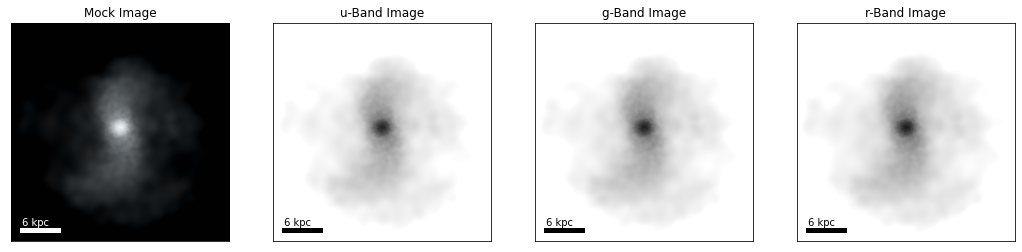

In [7]:
fig = plt.figure(figsize = (18, 10))

#scale bar set up
scale_kpc = FOV / 3
scale_kpc = int(scale_kpc)
pixel_bar = scale_kpc * 500 / FOV 
pixel_bar = int(pixel_bar)

ax = fig.add_subplot(1, 4, 1)
plt.imshow(mock_image)
ax.set_title('Mock Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50,50 + pixel_bar],[950,950],  c='white', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='white')


ax = fig.add_subplot(1, 4, 2)
im = ax.imshow(band_image_u, cmap=cm.gray_r, norm=LogNorm(vmin=5e4, vmax=1e8))
ax.set_title('u-Band Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50,50 + pixel_bar],[950,950],  c='black', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='black')


ax = fig.add_subplot(1, 4, 3)
im = ax.imshow(band_image_g, cmap=cm.gray_r, norm=LogNorm(vmin=5e4, vmax=1e8))
ax.set_title('g-Band Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50,50 + pixel_bar],[950,950],  c='black', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='black')


ax = fig.add_subplot(1, 4, 4)
im = ax.imshow(band_image_r, cmap=cm.gray_r, norm=LogNorm(vmin=5e4, vmax=1e8))
ax.set_title('r-Band Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50, 50 + pixel_bar],[950,950],  c='black', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='black')


plt.show()

## Looking at bound particles

In [8]:
#change this to your path
path_to_mock_image = 'firebox_image/firebox3094_zx_FOV18_bound_mock.npy'
path_to_band_image = 'firebox_image/firebox3094_zx_FOV18_bound_band.npy'

In [9]:
mock_image = np.load(path_to_mock_image)

band_image = np.load(path_to_band_image)

band_image_u = band_image[0] #u-band
band_image_g = band_image[1] #g-band
band_image_r = band_image[2] #r-band


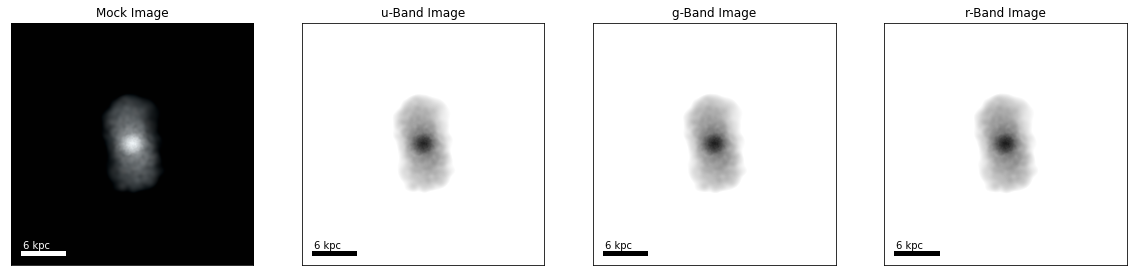

In [10]:
fig = plt.figure(figsize = (20, 10))

scale_kpc = FOV / 3
scale_kpc = int(scale_kpc)
pixel_bar = scale_kpc * 500 / FOV 
pixel_bar = int(pixel_bar)



ax = fig.add_subplot(1, 4, 1)
plt.imshow(mock_image)
ax.set_title('Mock Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50,50 + pixel_bar],[950,950],  c='white', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='white')

ax = fig.add_subplot(1, 4, 2)
im = ax.imshow(band_image_u, cmap=cm.gray_r, norm=LogNorm(vmin=5e4, vmax=1e8))
ax.set_title('u-Band Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50,50 + pixel_bar],[950,950],  c='black', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='black')

ax = fig.add_subplot(1, 4, 3)
im = ax.imshow(band_image_g, cmap=cm.gray_r, norm=LogNorm(vmin=5e4, vmax=1e8))
ax.set_title('g-Band Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50,50 + pixel_bar],[950,950],  c='black', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='black')

ax = fig.add_subplot(1, 4, 4)
im = ax.imshow(band_image_r, cmap=cm.gray_r, norm=LogNorm(vmin=5e4, vmax=1e8))
ax.set_title('r-Band Image')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot([50,50 + pixel_bar],[950,950],  c='black', linewidth='5')
ax.text(50, 930, f'{scale_kpc:.0f} kpc',color='black')

plt.show()

#### Measuring Sersic

There are 3 different ways to measure the seric profile.\
You the sersic_type='sersic', which is the default, to give you a 1D fit of the average surface brightness

In [11]:
fit_sersic?

/export/nfs0home/kleinca/my_tools/sersic_tools.py:38: RuntimeWarning: invalid value encountered in power
  return amplitude * np.exp ( -bn*( (r/r_eff)**(1/n) -1 ) )


I_0:  1.52e+07 L_sun kpc^-2
R_e:  0.92 kpc
n:    0.68


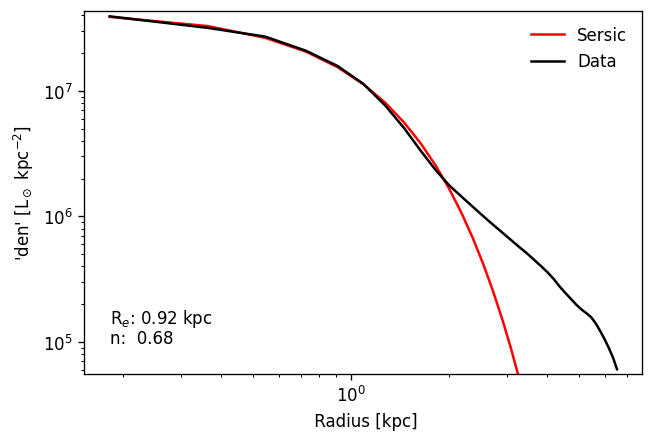

In [12]:

#measures the average surface bightness at each radius until it goes before 29.5mag/arcs2
rg,sb = measure_surfbright(band_image_g,FOV=FOV, nmeasure=100)


popt,std = fit_sersic(r=rg,sb=sb,FOV=FOV,ax_sersic=plt.gca())

print(f'I_0:  {popt[0]:.2e} L_sun kpc^-2')
print(f'R_e:  {popt[1]:.2f} kpc')
print(f'n:    {popt[2]:.2f}')
